# Grids

Grids are general types of plots that allow us to map plot types to rows and columns of a grid, this helps us create similar plots separated by features.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

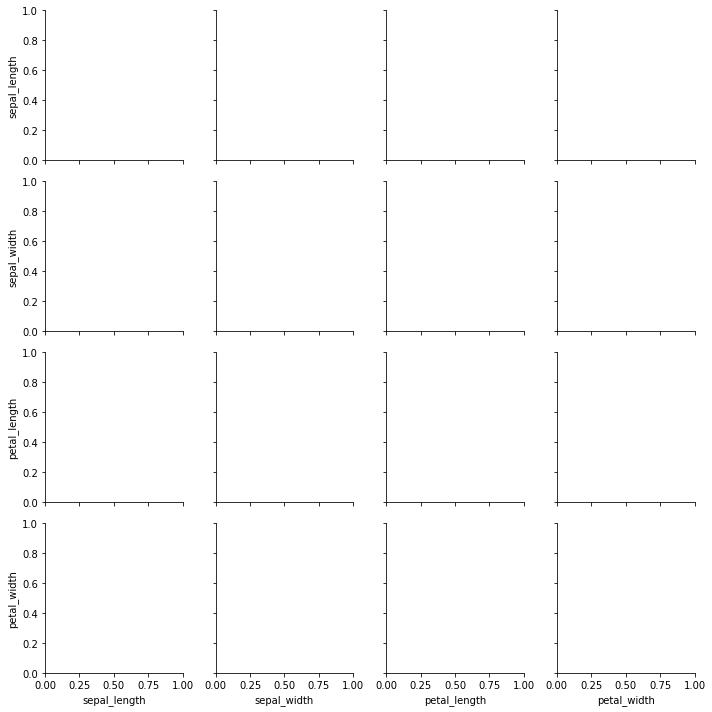

In [4]:
# First we create the PairGrid Object
sns.PairGrid(iris)

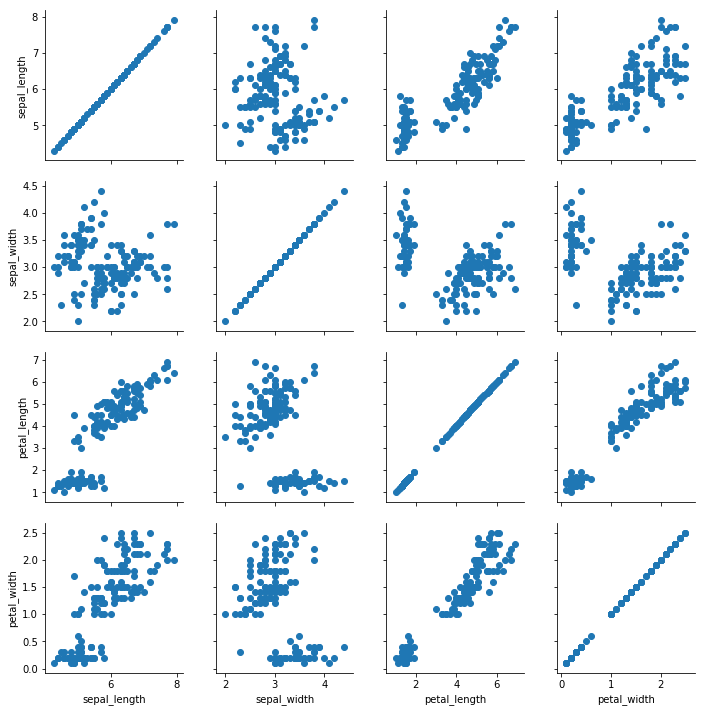

In [5]:
# Then we map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

/home/baka/Programs/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


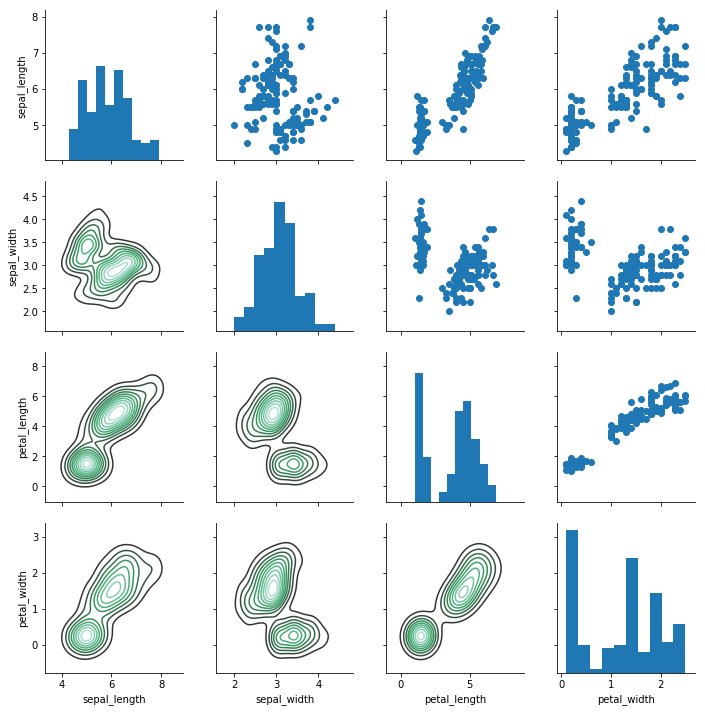

In [6]:
# or we can map to upper,lower, and diagonal. Note Grid is always square. Here(4, 4).
g = sns.PairGrid(iris)
g.map_diag(plt.hist) # in diagonals where x and y features are same
g.map_upper(plt.scatter) # upper traingle of the Grid
g.map_lower(sns.kdeplot) # lower traingle of the Grid

I searched the internet for the above warning and this is what I understand. Since we have 5 kdeplot here, it can't put same label for each of them and same goes for color, hence it shows the warning.

Also this stackoverflow thread have some similar issue raised: https://stackoverflow.com/questions/47698830/rasterization-of-contours-in-filled-contour-plot

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

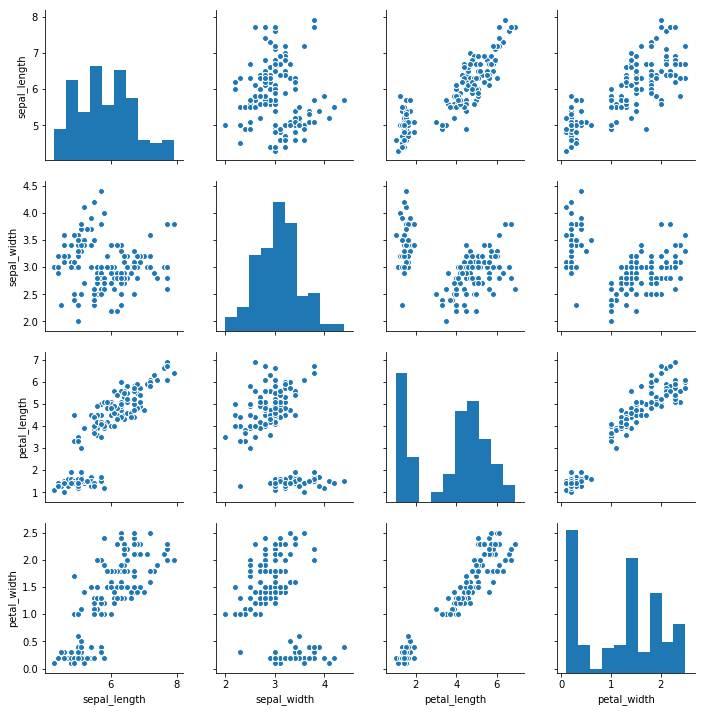

In [7]:
sns.pairplot(iris)

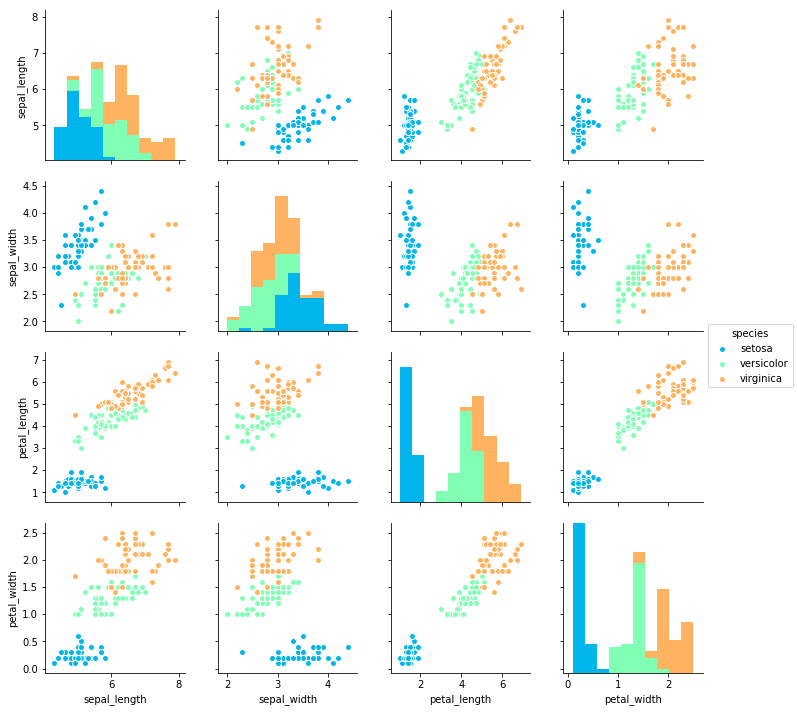

In [8]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [9]:
tips = sns.load_dataset('tips')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


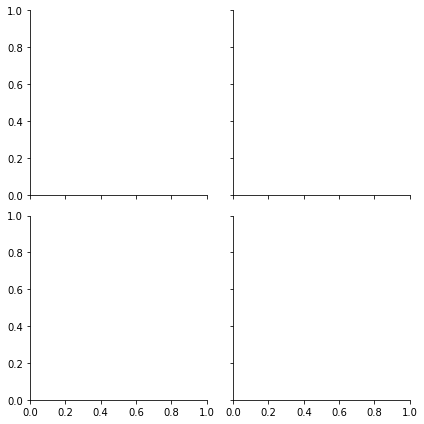

In [11]:
# First we create the FacetGrid Object
g = sns.FacetGrid(tips, col="time", row="smoker")

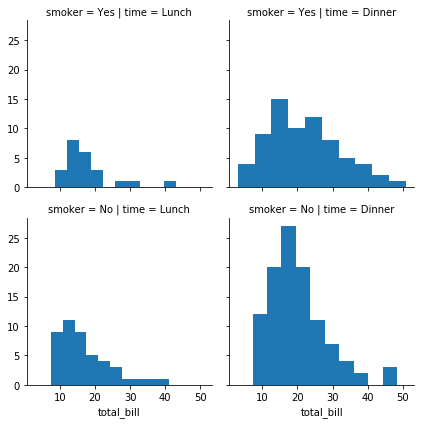

In [12]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

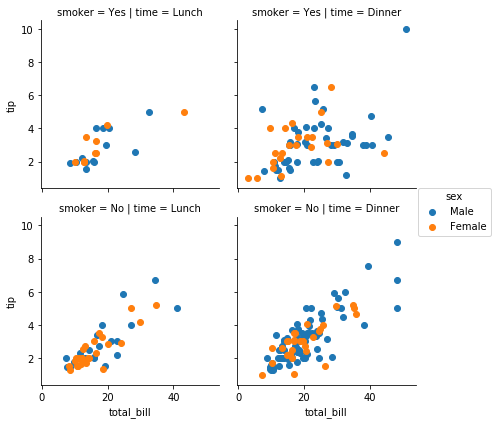

In [13]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice how the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

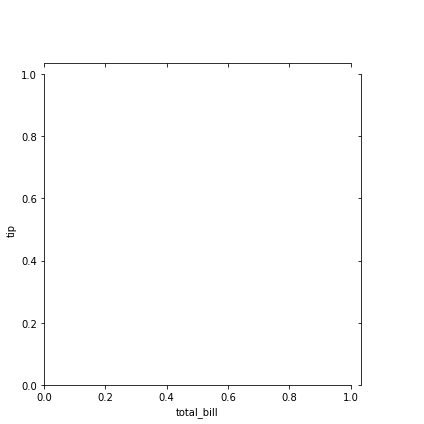

In [14]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

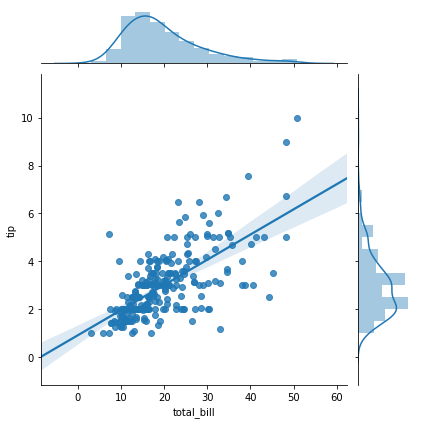

In [15]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

Reference the documentation as necessary for grid types, but most of the time we will use the easier plots.